# Data Association


In [1]:
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
    pass

# matplotlib rendering
%matplotlib inline

import sys
sys.path.append("../") # go to parent dir -> for module loading

!pip -q install -r ../requirements.txt

TensorFlow 2.x selected.
ERROR: Could not open requirements file: [Errno 2] No such file or directory: '../requirements.txt'


In [0]:
!wget -N pollithy.com/Pfeffer.zip
!unzip -q -z Pfeffer.zip

In [0]:
!wget -N pollithy.com/rnn_model_fake_data.h5

In [0]:
import tensorflow as tf

# custom modules
import data
import model

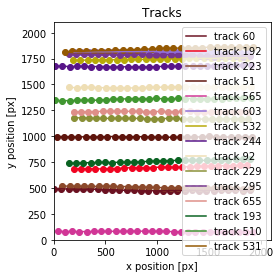

In [3]:
num_time_steps = 350
nan_value = 0
batch_size = 64
belt_width = 2000

dataset = data.FakeDataSet(timesteps=num_time_steps, batch_size=batch_size, number_trajectories=700, 
                           additive_noise_stddev=2, additive_target_stddev=20, belt_width=belt_width,
                          nan_value=nan_value)

dataset_train, dataset_test = dataset.get_tf_data_sets_seq2seq_data(normalized=True)

longest_track_time_steps = dataset.longest_track

dataset.plot_random_tracks(n=15)

In [4]:
# load model
model = tf.keras.models.load_model('rnn_model_fake_data.h5')

# summarize model.
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
masking_layer (Masking)      (64, 28, 2)               0         
_________________________________________________________________
rnn-0 (LSTM)                 (64, 28, 1024)            4206592   
_________________________________________________________________
rnn-1 (LSTM)                 (64, 28, 16)              66624     
_________________________________________________________________
dense_7 (Dense)              (64, 28, 2)               34        
Total params: 4,273,250
Trainable params: 4,273,250
Non-trainable params: 0
_________________________________________________________________
